<ipython-input-6-15b3540284fa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="Blues")


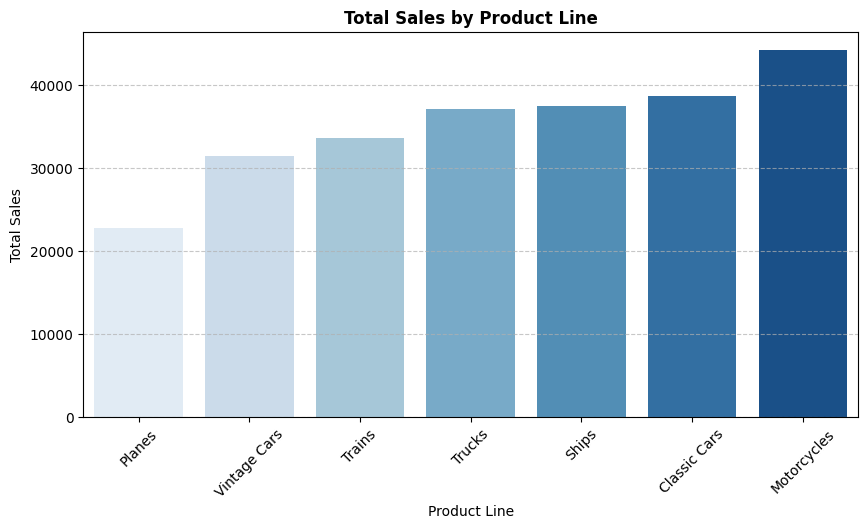

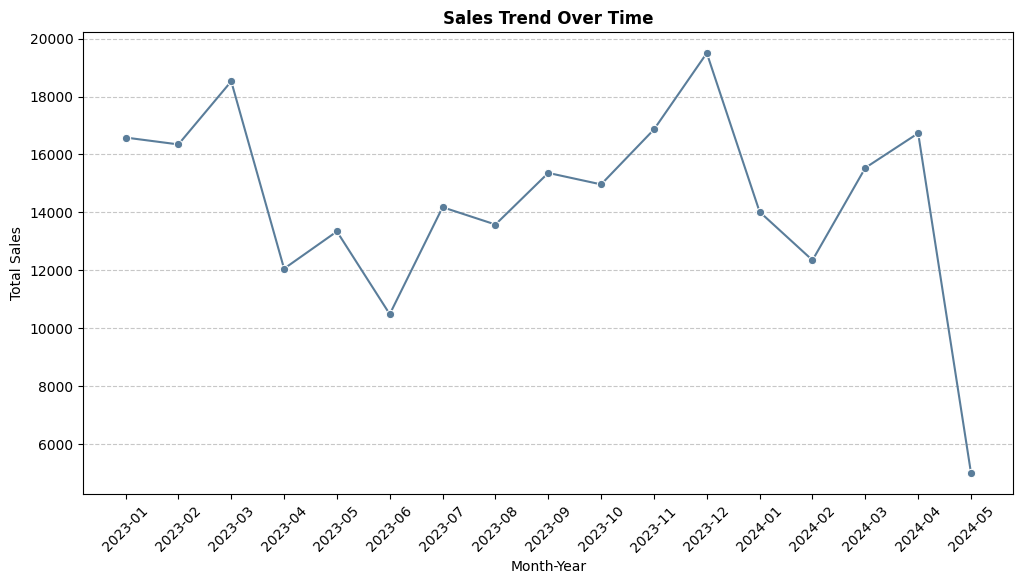

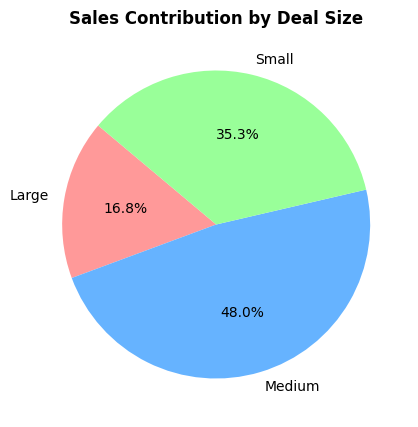

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membuat dataset
np.random.seed(42)
n_samples = 500
data = {
    "ORDERNUMBER": np.arange(1, n_samples + 1),
    "QUANTITYORDERED": np.random.randint(1, 20, n_samples),
    "PRICEEACH": np.random.uniform(5, 100, n_samples),
    "ORDERDATE": pd.date_range(start="2023-01-01", periods=n_samples, freq='D'),
    "STATUS": np.random.choice(["Shipped", "Cancelled", "On Hold"], n_samples, p=[0.8, 0.1, 0.1]),
    "PRODUCTLINE": np.random.choice(["Classic Cars", "Motorcycles", "Planes", "Ships", "Trains", "Trucks", "Vintage Cars"], n_samples),
    "PRODUCTCODE": [f"P{str(i).zfill(4)}" for i in range(n_samples)],
    "CUSTOMERNAME": np.random.choice(["Customer A", "Customer B", "Customer C", "Customer D"], n_samples),
    "CITY": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "Miami"], n_samples),
    "DEALSIZE": np.random.choice(["Small", "Medium", "Large"], n_samples, p=[0.4, 0.4, 0.2])
}
df = pd.DataFrame(data)

# Menambahkan kolom Total Sales
df["TOTALSALES"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

# 1. Produk dengan penjualan tertinggi dan terendah
product_sales = df.groupby("PRODUCTLINE")["TOTALSALES"].sum().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="Blues")
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line", fontweight="bold")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Simpan dan tampilkan grafik
plt.savefig("sales_by_product_line.png", dpi=300, bbox_inches="tight")
plt.show()

# 2. Tren penjualan dari waktu ke waktu
df["MonthYear"] = df["ORDERDATE"].dt.to_period("M")
time_series = df.groupby("MonthYear")["TOTALSALES"].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=time_series.index.astype(str), y=time_series.values, marker="o", color="#5a7d9a")
plt.xticks(rotation=45)
plt.title("Sales Trend Over Time", fontweight="bold")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Simpan dan tampilkan grafik
plt.savefig("sales_trend.png", dpi=300, bbox_inches="tight")
plt.show()

# 3. Korelasi ukuran transaksi dengan total sales
deal_size_sales = df.groupby("DEALSIZE")["TOTALSALES"].sum()
plt.figure(figsize=(8,5))
colors = ["#ff9999", "#66b3ff", "#99ff99"]
plt.pie(deal_size_sales, labels=deal_size_sales.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sales Contribution by Deal Size", fontweight="bold")

# Simpan dan tampilkan grafik
plt.savefig("sales_by_deal_size.png", dpi=300, bbox_inches="tight")
plt.show()

# Simpan dataset ke file CSV
df.to_csv("sales_data.csv", index=False)

# Unduh semua visualisasi
files.download("sales_by_product_line.png")
files.download("sales_trend.png")
files.download("sales_by_deal_size.png")
